## 1. Import basic libraries

In [2]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as mtick

## 2. Read final.csv

In [3]:
data = pd.read_csv('Data/final.csv')

## 3. And now let's carefully analyse the dataframe and its variables to check if we want to keep all of them and if we need to tidy any of them.

In [4]:
data.head(3)

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation_length
0,1752,11391,18,0,78.0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,268
1,1753,11391,53,0,85.0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,268
2,1754,11391,115,0,80.0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,268


In [5]:
data.tail(3)

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation_length
207316,37441,573320,227,0,100.0,GGG,2014J,F,South East Region,Lower Than A Level,80-90%,35-55,0,30,N,Fail,269
207317,37442,573320,227,0,20.0,GGG,2014J,F,South East Region,Lower Than A Level,80-90%,35-55,0,30,N,Fail,269
207318,37443,573320,227,0,40.0,GGG,2014J,F,South East Region,Lower Than A Level,80-90%,35-55,0,30,N,Fail,269


In [6]:
report = pandas_profiling.ProfileReport(data)
report

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207319 entries, 0 to 207318
Data columns (total 17 columns):
id_assessment                 207319 non-null int64
id_student                    207319 non-null int64
date_submitted                207319 non-null int64
is_banked                     207319 non-null int64
score                         207319 non-null float64
code_module                   207319 non-null object
code_presentation             207319 non-null object
gender                        207319 non-null object
region                        207319 non-null object
highest_education             207319 non-null object
imd_band                      207319 non-null object
age_band                      207319 non-null object
num_of_prev_attempts          207319 non-null int64
studied_credits               207319 non-null int64
disability                    207319 non-null object
final_result                  207319 non-null object
module_presentation_length    207319 non-null 

## 3.1 Categorical variables:

- id_assessment
- id_student
- is_banked
- code_module
- code_presentation
- gender
- region
- highest_education
- imd_band
- age_band
- disability
- final_result

### id_assessment

How many unique assessments do we have?

In [8]:
len(data.id_assessment.value_counts())

188

As this is a categorical variable, we need to transform the column type from int64 to object.

In [9]:
data['id_assessment'] = data['id_assessment'].apply(str)

In [10]:
crossidass = pd.crosstab(data.score, data.id_assessment, margins=True, margins_name='Total')
display(crossidass.head(3))
display(crossidass.tail(3))

id_assessment,14984,14985,14986,14987,14988,14989,14991,14992,14993,14994,...,37435,37436,37437,37438,37439,37440,37441,37442,37443,Total
score,,,,,,,,,,,,,,,,,,,,,
0.0,6,6,10,8,7,6,1,3,0,1,...,2,1,2,1,0,1,1,10,5,617
1.0,0,0,0,0,0,0,0,0,0,0,...,0,1,3,0,0,0,0,0,0,783
2.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17


id_assessment,14984,14985,14986,14987,14988,14989,14991,14992,14993,14994,...,37435,37436,37437,37438,37439,37440,37441,37442,37443,Total
score,,,,,,,,,,,,,,,,,,,,,
99.0,1,1,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,978
100.0,0,1,2,2,5,4,947,670,560,552,...,0,0,0,341,263,236,334,142,191,20522
Total,1434,1282,1104,949,889,775,1259,1120,1023,960,...,591,545,504,535,508,483,477,419,345,207319


### id_student

How many different students do we have data from?

In [11]:
len(data.id_student.value_counts())

23369

Same way as id_assessment, this is a categorical variable, so we need to apply the same transformation.

In [12]:
data['id_student'] = data['id_student'].apply(str)

In [13]:
crossidst = pd.crosstab(data.score, data.id_student, margins=True, margins_name='Total')
display(crossidst.head(3))
display(crossidst.tail(3))

id_student,100064,100282,100561,1006742,100788,1008675,100893,101116,101217,101279,...,99151,991843,992544,996047,99670,99799,998493,999174,99993,Total
score,,,,,,,,,,,,,,,,,,,,,
0.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,617
1.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,783
2.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17


id_student,100064,100282,100561,1006742,100788,1008675,100893,101116,101217,101279,...,99151,991843,992544,996047,99670,99799,998493,999174,99993,Total
score,,,,,,,,,,,,,,,,,,,,,
99.0,0,0,0,0,2,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,978
100.0,0,0,0,0,2,4,0,0,0,0,...,0,0,1,0,2,1,0,0,0,20522
Total,12,1,7,2,34,11,5,5,4,1,...,1,4,5,4,8,10,5,12,11,207319


### is_banked

A status flag indicating that the assessment result has been transferred from a previous presentation.

In [14]:
data.is_banked.value_counts()

0    203770
1      3549
Name: is_banked, dtype: int64

Same way as before, we apply the same transformation.

In [15]:
data['is_banked'] = data['is_banked'].apply(str)

In [16]:
crossbanked = pd.crosstab(data.score, data.is_banked, margins=True, margins_name='Total')
display(crossbanked.head(3))
display(crossbanked.tail(3))

is_banked,0,1,Total
score,,,
0.0,615,2,617
1.0,783,0,783
2.0,17,0,17


is_banked,0,1,Total
score,,,
99.0,971,7,978
100.0,20242,280,20522
Total,203770,3549,207319


### code_module

In [17]:
data.code_module.value_counts()

FFF    60435
BBB    45166
DDD    37457
CCC    32899
GGG    15507
EEE    12488
AAA     3367
Name: code_module, dtype: int64

In [18]:
crossmodule = pd.crosstab(data.score, data.code_module, margins=True, margins_name='Total')
display(crossmodule.head(3))
display(crossmodule.tail(3))

code_module,AAA,BBB,CCC,DDD,EEE,FFF,GGG,Total
score,,,,,,,,
0.0,6,133,130,121,47,128,52,617
1.0,0,753,1,7,1,2,19,783
2.0,0,0,8,4,3,2,0,17


code_module,AAA,BBB,CCC,DDD,EEE,FFF,GGG,Total
score,,,,,,,,
99.0,0,9,248,120,152,447,2,978
100.0,0,11117,1848,778,289,1094,5396,20522
Total,3367,45166,32899,37457,12488,60435,15507,207319


### code_presentation

In [19]:
data.code_presentation.value_counts()

2014J    64935
2013J    56080
2014B    49992
2013B    36312
Name: code_presentation, dtype: int64

In [20]:
crosspres = pd.crosstab(data.score, data.code_presentation, margins=True, margins_name='Total')
display(crosspres.head(3))
display(crosspres.tail(3))

code_presentation,2013B,2013J,2014B,2014J,Total
score,,,,,
0.0,119,115,205,178,617
1.0,7,29,23,724,783
2.0,4,3,5,5,17


code_presentation,2013B,2013J,2014B,2014J,Total
score,,,,,
99.0,111,219,245,403,978
100.0,3588,6690,5463,4781,20522
Total,36312,56080,49992,64935,207319


### gender

In [21]:
data.gender.value_counts()

M    118848
F     88471
Name: gender, dtype: int64

In [22]:
crossgender = pd.crosstab(data.score, data.gender, margins=True, margins_name='Total')
display(crossgender.head(3))
display(crossgender.tail(3))

gender,F,M,Total
score,,,
0.0,262,355,617
1.0,693,90,783
2.0,4,13,17


gender,F,M,Total
score,,,
99.0,234,744,978
100.0,15209,5313,20522
Total,88471,118848,207319


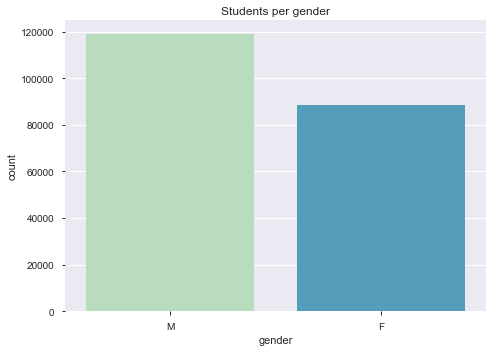

In [23]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
sns.countplot(x="gender", data=data, palette='GnBu')
ax.set_title("Students per gender")
plt.tight_layout()
plt.show()

### region

In [24]:
data.region.value_counts()

Scotland                22705
East Anglian Region     21428
South Region            20883
London Region           19537
North Western Region    16863
South West Region       15938
West Midlands Region    15604
East Midlands Region    14719
South East Region       13718
Wales                   12970
North Region            12271
Yorkshire Region        12159
Ireland                  8524
Name: region, dtype: int64

In [25]:
crossregion = pd.crosstab(data.score, data.region, margins=True, margins_name='Total')
display(crossregion.head(3))
display(crossregion.tail(3))

region,East Anglian Region,East Midlands Region,Ireland,London Region,North Region,North Western Region,Scotland,South East Region,South Region,South West Region,Wales,West Midlands Region,Yorkshire Region,Total
score,,,,,,,,,,,,,,
0.0,48,44,35,69,42,45,54,22,53,41,56,56,52,617
1.0,84,62,7,55,40,49,70,50,98,54,90,55,69,783
2.0,1,0,0,1,0,3,7,1,1,2,0,1,0,17


region,East Anglian Region,East Midlands Region,Ireland,London Region,North Region,North Western Region,Scotland,South East Region,South Region,South West Region,Wales,West Midlands Region,Yorkshire Region,Total
score,,,,,,,,,,,,,,
99.0,83,53,40,100,96,67,150,54,104,70,42,62,57,978
100.0,2297,1575,764,1846,945,1437,1803,1637,2010,1782,1531,1617,1278,20522
Total,21428,14719,8524,19537,12271,16863,22705,13718,20883,15938,12970,15604,12159,207319


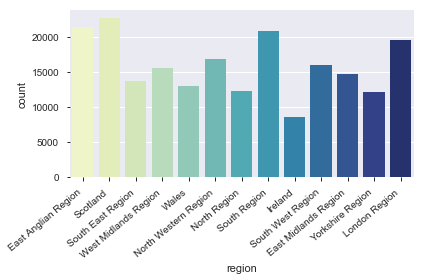

In [26]:
ax = sns.countplot(x="region", data=data, palette='YlGnBu')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

### highest_education

In [27]:
data.highest_education.value_counts()

A Level or Equivalent          95399
Lower Than A Level             73733
HE Qualification               33848
Post Graduate Qualification     2713
No Formal quals                 1626
Name: highest_education, dtype: int64

In [28]:
crosshi = pd.crosstab(data.score, data.highest_education, margins=True, margins_name='Total')
display(crosshi.head(3))
display(crosshi.tail(3))

highest_education,A Level or Equivalent,HE Qualification,Lower Than A Level,No Formal quals,Post Graduate Qualification,Total
score,,,,,,
0.0,251,72,270,20,4,617
1.0,329,107,334,10,3,783
2.0,3,6,8,0,0,17


highest_education,A Level or Equivalent,HE Qualification,Lower Than A Level,No Formal quals,Post Graduate Qualification,Total
score,,,,,,
99.0,418,268,241,3,48,978
100.0,9137,2806,8119,181,279,20522
Total,95399,33848,73733,1626,2713,207319


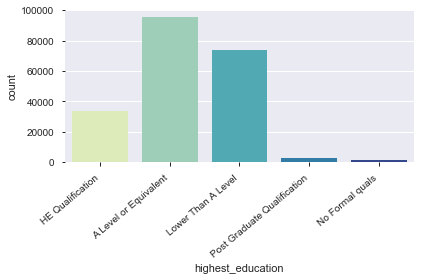

In [29]:
ax = sns.countplot(x="highest_education", data=data, palette='YlGnBu')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

### imd_band

Specifies the Index of Multiple Depravation band of the place where the student lived during the module-presentation.

In [30]:
data.imd_band.value_counts()

30-40%     22785
20-30%     21116
50-60%     20004
40-50%     19981
10-20      19806
70-80%     19433
60-70%     19324
80-90%     19156
90-100%    18272
0-10%      18127
?           9315
Name: imd_band, dtype: int64

In [31]:
crossimd = pd.crosstab(data.score, data.imd_band, margins=True, margins_name='Total')
display(crossimd.head(3))
display(crossimd.tail(3))

imd_band,0-10%,10-20,20-30%,30-40%,40-50%,50-60%,60-70%,70-80%,80-90%,90-100%,?,Total
score,,,,,,,,,,,,
0.0,101,95,77,65,53,55,45,47,34,31,14,617
1.0,75,109,98,94,81,80,73,61,62,43,7,783
2.0,1,3,0,0,1,3,3,5,0,1,0,17


imd_band,0-10%,10-20,20-30%,30-40%,40-50%,50-60%,60-70%,70-80%,80-90%,90-100%,?,Total
score,,,,,,,,,,,,
99.0,59,68,64,98,84,87,96,87,110,135,90,978
100.0,1777,2065,2134,2205,2098,2133,1888,1904,1924,1793,601,20522
Total,18127,19806,21116,22785,19981,20004,19324,19433,19156,18272,9315,207319


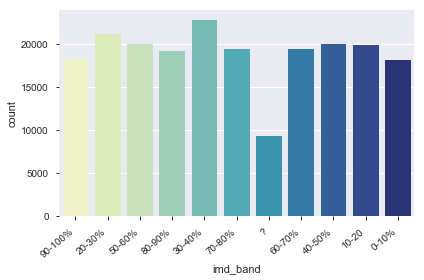

In [32]:
ax = sns.countplot(x="imd_band", data=data, palette='YlGnBu')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

### age_band

In [33]:
data.age_band.value_counts()

0-35     143353
35-55     62423
55<=       1543
Name: age_band, dtype: int64

In [34]:
crossage = pd.crosstab(data.score, data.age_band, margins=True, margins_name='Total')
display(crossage.head(3))
display(crossage.tail(3))

age_band,0-35,35-55,55<=,Total
score,,,,
0.0,441,171,5,617
1.0,501,279,3,783
2.0,12,5,0,17


age_band,0-35,35-55,55<=,Total
score,,,,
99.0,604,358,16,978
100.0,12248,8156,118,20522
Total,143353,62423,1543,207319


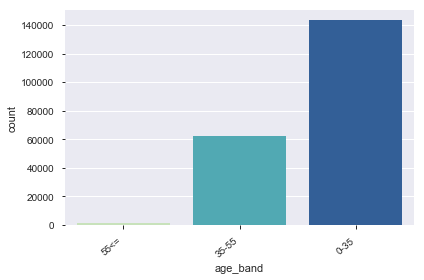

In [35]:
ax = sns.countplot(x="age_band", data=data, palette='YlGnBu')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

### disability

In [36]:
data.disability.value_counts()

N    188358
Y     18961
Name: disability, dtype: int64

In [37]:
crossdi = pd.crosstab(data.score, data.disability, margins=True, margins_name='Total')
display(crossdi.head(3))
display(crossdi.tail(3))

disability,N,Y,Total
score,,,
0.0,535,82,617
1.0,710,73,783
2.0,15,2,17


disability,N,Y,Total
score,,,
99.0,922,56,978
100.0,18556,1966,20522
Total,188358,18961,207319


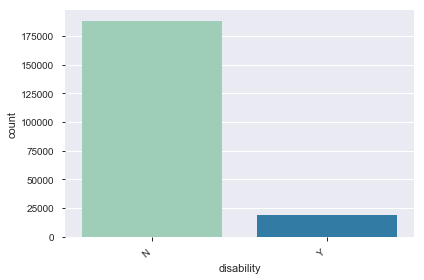

In [38]:
ax = sns.countplot(x="disability", data=data, palette='YlGnBu')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

### final_result

In [39]:
data.final_result.value_counts()

Pass           118025
Fail            32976
Distinction     30344
Withdrawn       25974
Name: final_result, dtype: int64

In [40]:
crossfi = pd.crosstab(data.score, data.final_result, margins=True, margins_name='Total')
display(crossfi.head(3))
display(crossfi.tail(3))

final_result,Distinction,Fail,Pass,Withdrawn,Total
score,,,,,
0.0,5,265,116,231,617
1.0,81,146,385,171,783
2.0,0,7,3,7,17


final_result,Distinction,Fail,Pass,Withdrawn,Total
score,,,,,
99.0,464,39,417,58,978
100.0,5679,2177,11235,1431,20522
Total,30344,32976,118025,25974,207319


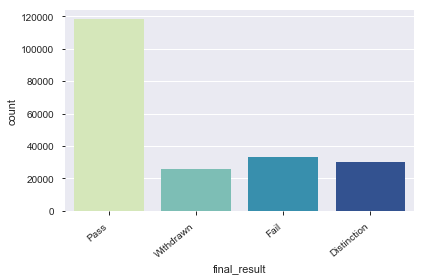

In [41]:
ax = sns.countplot(x="final_result", data=data, palette='YlGnBu')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

## Numerical variables:

- date_submitted
- score
- num_of_prev_attempts
- studied_credits
- module_presentation_length

"Score" column should be numeric, so we will have to transform the column type later on, when we get to analyse the column.

### date_submitted

The date of student submission, measured as the number of days since the start of the module presentation.

count    207319.000000
mean        114.501493
std          72.473110
min         -11.000000
25%          50.000000
50%         114.000000
75%         172.000000
max         608.000000
Name: date_submitted, dtype: float64

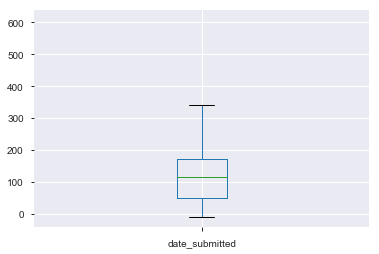

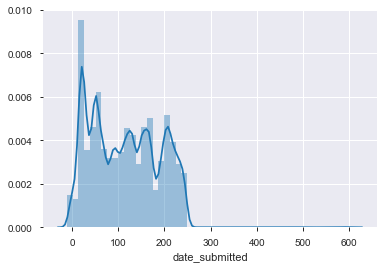

In [42]:
display(data.date_submitted.describe())

data.boxplot(column= ['date_submitted'])
plt.show()

sns.distplot(data.date_submitted)
plt.show()

In [43]:
crossdate = pd.crosstab(data.score, data.date_submitted, margins=True, margins_name='Total')
display(crossdate.head(3))
display(crossdate.tail(3))

date_submitted,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,...,570,578,584,586,590,591,592,594,608,Total
score,,,,,,,,,,,,,,,,,,,,,
0.0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,617
1.0,0,0,0,0,0,1,3,2,6,3,...,0,0,0,0,0,0,0,0,0,783
2.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17


date_submitted,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,...,570,578,584,586,590,591,592,594,608,Total
score,,,,,,,,,,,,,,,,,,,,,
99.0,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,978
100.0,0,0,0,6,0,0,5,5,8,7,...,0,0,0,0,0,0,0,0,0,20522
Total,1,1,1,44,4,7,13,12,32,28,...,2,4,6,2,2,10,6,8,10,207319


We see that our minimum value is -11. This does not seem to make much sense since noone can submit an assessment before it's published. Our maximum value also seems exagerated.

Let's check the relationship between our negative date_submitted values and the final_result:

In [44]:
outliers_final_result = data[data['date_submitted']< 0][['date_submitted','final_result']]
outliers_final_result.final_result.value_counts()

Withdrawn      2003
Fail            898
Pass            690
Distinction     121
Name: final_result, dtype: int64

Let's zoom in the Pass and Distinction, to check if this is because they were banked:

In [45]:
outliers_final_result_pass = data[(data.date_submitted < 0) & (data.final_result == "Pass")]
outliers_final_result_pass.is_banked.value_counts()

1    607
0     83
Name: is_banked, dtype: int64

In [46]:
outliers_final_result_distinct = data[(data.date_submitted < 0) & (data.final_result == "Distinction")]
outliers_final_result_distinct.is_banked.value_counts()

1    94
0    27
Name: is_banked, dtype: int64

We have a total of 110 rows where the date_submitted have a negative value and the is_banked flag is 0. 

# What should we do with them? Martinada

Now let's check the relationship between our greater than 365 date_submitted values and the final_result:

In [47]:
outliers_final_result_late = data[data['date_submitted']>365][['date_submitted','final_result']]
outliers_final_result_late.final_result.value_counts()

Withdrawn      69
Pass           34
Fail           15
Distinction     3
Name: final_result, dtype: int64

### score

The student’s score in this assessment. The range is from 0 to 100. The score lower than 40 is interpreted

In [48]:
len(data.score.value_counts())

103

Seems weird to have 102 values since students should be rated from 0 to 100 (101 values).

Also, remember that this column is an object, and we need it to be numeric.

In [49]:
data.score.unique()

array([ 78.        ,  85.        ,  80.        ,  82.        ,
        70.        ,  68.        ,  64.        ,  60.        ,
        72.        ,  71.        ,  74.        ,  88.        ,
        75.        ,  69.        ,  30.        ,  63.        ,
        35.        ,  79.        ,  50.        ,  65.        ,
        62.        ,  73.        ,  81.        ,  76.        ,
        67.        ,  89.        ,  77.        ,  83.        ,
        42.        ,  66.        ,  59.        ,  61.        ,
        38.        ,  86.        ,  18.        ,  49.        ,
        57.        ,  55.        ,  84.        ,  47.        ,
        51.        ,  56.        ,  53.        ,  54.        ,
        45.        ,  87.        ,  46.        ,  43.        ,
        52.        ,  39.        ,  37.        ,  48.        ,
        40.        ,  32.        ,  90.        ,  58.        ,
        93.        ,  28.        ,  44.        ,  33.        ,
         0.        ,  94.        ,  91.        ,  95.  

We have a '?' value!

In [50]:
#There are quite a few '?' values

len(data[data['score']== '?'])

/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


0

Let's check the relationship between those values and final_result:

In [51]:
#Most of them are 'withdrawn' or 'fail'

unknown_score_final_result = data[data['score']=='?'][['score','final_result']]
unknown_score_final_result.final_result.value_counts()

Series([], Name: final_result, dtype: int64)

In [52]:
#We transform the column type to numeric and coerce errors

data.score = pd.to_numeric(data.score, errors='coerce')

In [53]:
data.score.unique()

array([ 78.        ,  85.        ,  80.        ,  82.        ,
        70.        ,  68.        ,  64.        ,  60.        ,
        72.        ,  71.        ,  74.        ,  88.        ,
        75.        ,  69.        ,  30.        ,  63.        ,
        35.        ,  79.        ,  50.        ,  65.        ,
        62.        ,  73.        ,  81.        ,  76.        ,
        67.        ,  89.        ,  77.        ,  83.        ,
        42.        ,  66.        ,  59.        ,  61.        ,
        38.        ,  86.        ,  18.        ,  49.        ,
        57.        ,  55.        ,  84.        ,  47.        ,
        51.        ,  56.        ,  53.        ,  54.        ,
        45.        ,  87.        ,  46.        ,  43.        ,
        52.        ,  39.        ,  37.        ,  48.        ,
        40.        ,  32.        ,  90.        ,  58.        ,
        93.        ,  28.        ,  44.        ,  33.        ,
         0.        ,  94.        ,  91.        ,  95.  

Of course, now the '?' values have been transformed to NaNs.

In [54]:
data.isnull().sum()

id_assessment                 0
id_student                    0
date_submitted                0
is_banked                     0
score                         0
code_module                   0
code_presentation             0
gender                        0
region                        0
highest_education             0
imd_band                      0
age_band                      0
num_of_prev_attempts          0
studied_credits               0
disability                    0
final_result                  0
module_presentation_length    0
dtype: int64

In order to get rid of those NaNs, we decide the following:

- For those which final_result is "Withdrawn" of "Fail", we will change the value to 0.
- For those which final_result is "Pass", we will fill the value with the mean of all "Pass".
- For those which final_result is "Distinction", we will fill the value with the mean of all "Distinction".

In [55]:
data['score'] = np.where(((data['score'].isnull()) & (data['final_result'] =="Withdrawn")),0,data['score'])
data['score'] = np.where(((data['score'].isnull()) & (data['final_result'] =="Fail")),0,data['score'])
data['score'] = np.where(((data['score'].isnull()) & (data['final_result'] =="Pass")),
                         data[data['final_result']=='Pass']['score'].mean(),data['score'])
data['score'] = np.where(((data['score'].isnull()) & (data['final_result'] =="Distinction")),
                         data[data['final_result']=='Distinction']['score'].mean(),data['score'])

We check that we successfully got rid of the NaNs.

In [56]:
data.isnull().sum()

id_assessment                 0
id_student                    0
date_submitted                0
is_banked                     0
score                         0
code_module                   0
code_presentation             0
gender                        0
region                        0
highest_education             0
imd_band                      0
age_band                      0
num_of_prev_attempts          0
studied_credits               0
disability                    0
final_result                  0
module_presentation_length    0
dtype: int64

So now we can analyze the column.

count    207319.000000
mean         75.335067
std          19.204038
min           0.000000
25%          65.000000
50%          79.000000
75%          89.000000
max         100.000000
Name: score, dtype: float64

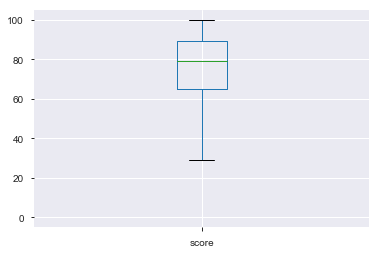

In [57]:
display(data.score.describe())
data.boxplot(column= ['score'])
plt.show()

# ordenar el gráfico de arriba

### num_of_prev_attempts

In [58]:
data.num_of_prev_attempts.value_counts()

0    181263
1     21010
2      4008
3       758
4       215
5        49
6        16
Name: num_of_prev_attempts, dtype: int64

In [59]:
crossatt = pd.crosstab(data.score, data.num_of_prev_attempts, margins=True, margins_name='Total')
display(crossatt.head(3))
display(crossatt.tail(3))

num_of_prev_attempts,0,1,2,3,4,5,6,Total
score,,,,,,,,
0.0,487,92,30,8,0,0,0,617
1.0,687,74,14,8,0,0,0,783
2.0,15,1,1,0,0,0,0,17


num_of_prev_attempts,0,1,2,3,4,5,6,Total
score,,,,,,,,
99.0,922,50,6,0,0,0,0,978
100.0,18441,1621,366,74,14,5,1,20522
Total,181263,21010,4008,758,215,49,16,207319


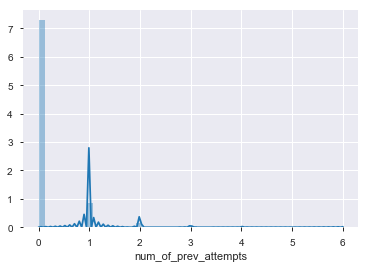

In [60]:
sns.distplot(data.num_of_prev_attempts)
plt.show()

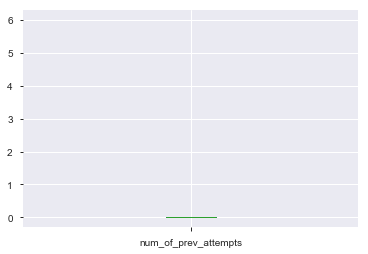

In [61]:
data.boxplot(column= ['num_of_prev_attempts'])

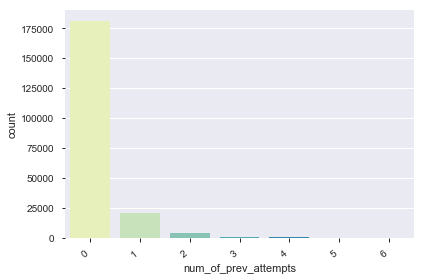

In [62]:
ax = sns.countplot(x="num_of_prev_attempts", data=data, palette='YlGnBu')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

### studied_credits

In [63]:
data.studied_credits.value_counts()

60     109791
120     38067
30      22403
90      22275
150      4936
180      4208
240       975
75        780
210       758
70        708
130       254
45        207
80        206
270       202
100       197
135       186
300       114
160       113
40        109
110        98
105        79
195        66
190        51
140        47
165        47
220        39
145        38
360        38
330        34
250        31
170        29
200        25
115        23
85         21
50         19
310        17
95         15
155        14
235        12
280        12
325        11
430        11
55         10
225         9
630         9
345         6
420         5
65          4
255         4
215         3
205         2
355         1
Name: studied_credits, dtype: int64

In [64]:
crosscre = pd.crosstab(data.score, data.studied_credits, margins=True, margins_name='Total')
display(crosscre.head(3))
display(crosscre.tail(3))

studied_credits,30,40,45,50,55,60,65,70,75,80,...,310,325,330,345,355,360,420,430,630,Total
score,,,,,,,,,,,,,,,,,,,,,
0.0,65,0,1,0,0,295,0,0,1,6,...,1,0,0,0,0,0,0,0,0,617
1.0,19,0,0,0,0,566,0,0,3,0,...,0,0,0,0,0,0,0,0,0,783
2.0,2,0,0,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17


studied_credits,30,40,45,50,55,60,65,70,75,80,...,310,325,330,345,355,360,420,430,630,Total
score,,,,,,,,,,,,,,,,,,,,,
99.0,77,2,1,0,0,528,0,6,1,1,...,0,0,1,0,0,0,0,0,0,978
100.0,5387,12,33,3,0,9553,0,35,87,5,...,0,2,8,0,0,0,0,0,1,20522
Total,22403,109,207,19,10,109791,4,708,780,206,...,17,11,34,6,1,38,5,11,9,207319


count    207319.000000
mean         78.153474
std          38.000677
min          30.000000
25%          60.000000
50%          60.000000
75%          90.000000
max         630.000000
Name: studied_credits, dtype: float64

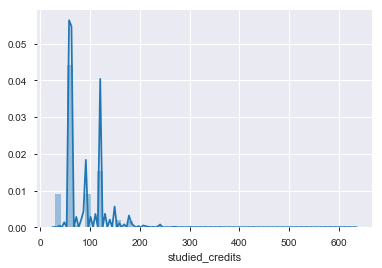

In [65]:
display(data.studied_credits.describe())

sns.distplot(data.studied_credits)
plt.show()

There are some rows where the studied_credits are greater than 360.

In [66]:
len(data[data['studied_credits']>360])

25

Let's check the relationship between those values and the final_result.

In [67]:
studiedcreditsout = data[data['studied_credits']>360][['studied_credits','final_result']]
studiedcreditsout.final_result.value_counts()

Pass    25
Name: final_result, dtype: int64

### module_presentation_length

In [68]:
data.module_presentation_length.value_counts()

269    47544
241    39620
268    39364
240    36312
262    17391
261    16716
234    10372
Name: module_presentation_length, dtype: int64

In [69]:
crossle = pd.crosstab(data.score, data.module_presentation_length, margins=True, margins_name='Total')
display(crossle.head(3))
display(crossle.tail(3))

module_presentation_length,234,240,241,261,262,268,269,Total
score,,,,,,,,
0.0,32,119,173,37,54,78,124,617
1.0,16,7,7,14,719,15,5,783
2.0,0,4,5,0,0,3,5,17


module_presentation_length,234,240,241,261,262,268,269,Total
score,,,,,,,,
99.0,2,111,243,33,35,186,368,978
100.0,2730,3588,2733,2370,1579,4320,3202,20522
Total,10372,36312,39620,16716,17391,39364,47544,207319


In [70]:
data.module_presentation_length.describe()

count    207319.000000
mean        255.396534
std          13.521161
min         234.000000
25%         241.000000
50%         262.000000
75%         268.000000
max         269.000000
Name: module_presentation_length, dtype: float64

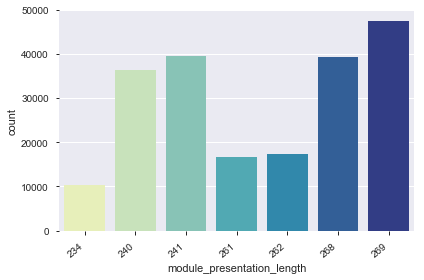

In [71]:
ax = sns.countplot(x="module_presentation_length", data=data, palette='YlGnBu')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [72]:
data.to_csv('Data/final.csv', index=False)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207319 entries, 0 to 207318
Data columns (total 17 columns):
id_assessment                 207319 non-null object
id_student                    207319 non-null object
date_submitted                207319 non-null int64
is_banked                     207319 non-null object
score                         207319 non-null float64
code_module                   207319 non-null object
code_presentation             207319 non-null object
gender                        207319 non-null object
region                        207319 non-null object
highest_education             207319 non-null object
imd_band                      207319 non-null object
age_band                      207319 non-null object
num_of_prev_attempts          207319 non-null int64
studied_credits               207319 non-null int64
disability                    207319 non-null object
final_result                  207319 non-null object
module_presentation_length    207319 non-nu

# Let's now see the correlation

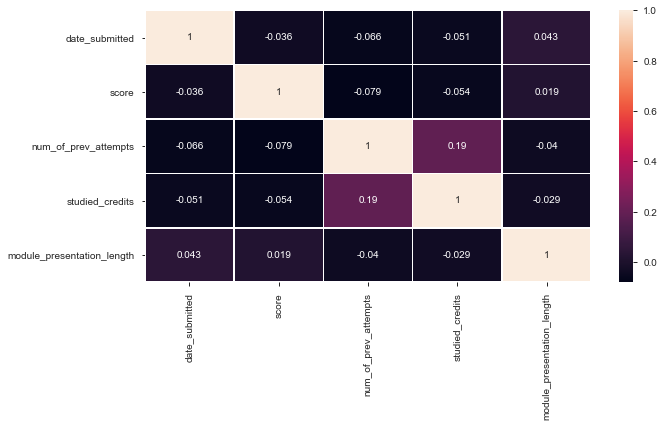

In [74]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207319 entries, 0 to 207318
Data columns (total 17 columns):
id_assessment                 207319 non-null object
id_student                    207319 non-null object
date_submitted                207319 non-null int64
is_banked                     207319 non-null object
score                         207319 non-null float64
code_module                   207319 non-null object
code_presentation             207319 non-null object
gender                        207319 non-null object
region                        207319 non-null object
highest_education             207319 non-null object
imd_band                      207319 non-null object
age_band                      207319 non-null object
num_of_prev_attempts          207319 non-null int64
studied_credits               207319 non-null int64
disability                    207319 non-null object
final_result                  207319 non-null object
module_presentation_length    207319 non-nu

In [6]:
data.shape

(207319, 17)

In [78]:
data = data.to_csv('Data/ml.csv', index=False)

AttributeError: 'NoneType' object has no attribute 'to_csv'